# Chapter 2 - Some Simple Time Series

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt
from statsmodels.tsa.stattools import adfuller

### Taxing Exercise: Compute the ACF

In [5]:
HRB = pd.read_excel('data/HRB.xlsx')
HRB = pd.DataFrame(HRB)

HRB.head()

,Quarter,Earnings
0,2007Q1,-0.36
1,2007Q2,-0.38
2,2007Q3,0.07
3,2007Q4,1.85
4,2008Q1,-0.34


In [6]:
# Convert date to index
HRB = HRB.set_index('Quarter')

HRB.head()

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34


In [7]:
HRB.tail()

,Earnings
Quarter,
2016Q4,3.17
2017Q1,-0.55
2017Q2,-0.67
2017Q3,-0.45
2017Q4,3.76


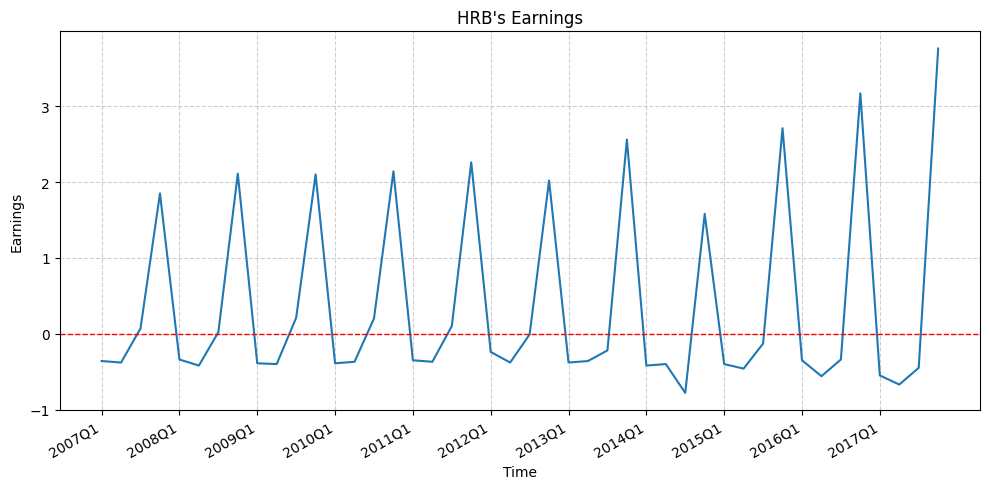

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(HRB)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1) 
ax.set_xlabel('Time')
ax.set_ylabel('Earnings')
ax.set_title("HRB's Earnings")
ax.grid(True, linestyle='--', alpha=0.6)  

# Set x-ticks every 4th tick
ticks = HRB.index[::4]  # Select every 4th index
ax.set_xticks(ticks)    # Set x-ticks

fig.autofmt_xdate()
plt.tight_layout()

In [9]:
# Compute the acf array of HRB
acf_array = acf(HRB)
acf_array

array([ 1.        , -0.22122696, -0.39856504, -0.26615093,  0.83479804,
       -0.1901038 , -0.3475634 , -0.23140368,  0.71995993, -0.15661007,
       -0.29766783, -0.22097189,  0.61656933, -0.15022869, -0.27922022,
       -0.22465946,  0.5725259 ])

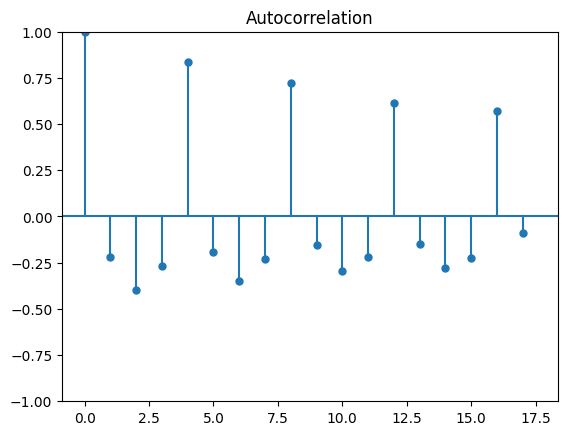

In [10]:
# Plot the acf function
plot_acf(HRB, alpha = 1) # alpha =1 suppress the inteval
plt.show()

### Are We Confident This Stock is Mean Reverting?

In the last chapter, you saw that the autocorrelation of MSFT's weekly stock 
returns was -0.16. That autocorrelation seems large, but is it statistically 
significant? In other words, can you say that there is less than a 5% chance 
that we would observe such a large negative autocorrelation if the true 
autocorrelation were really zero? And are there any autocorrelations at other 
lags that are significantly different from zero?

Even if the true autocorrelations were zero at all lags, in a finite sample of 
returns you won't see the estimate of the autocorrelations exactly zero. In 
fact, the standard deviation of the sample autocorrelation is 1/N−−√ where N 
is the number of observations, so if N=100, for example, the standard deviation 
of the ACF is 0.1, and since 95% of a normal curve is between +1.96 and -1.96 
standard deviations from the mean, the 95% confidence interval is ±1.96/N−−√. 
This approximation only holds when the true autocorrelations are all

In [13]:
returns = pd.read_excel('data/returns.xlsx')
returns = pd.DataFrame(returns)

returns.head()

,Date,Adj Close
0,2012-08-19,0.022508
1,2012-08-26,-0.011003
2,2012-09-02,0.008508
3,2012-09-09,0.004218
4,2012-09-16,0.008400


In [14]:
# Convert date to index
returns = returns.set_index('Date')
returns.head()

,Adj Close
Date,
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218
2012-09-16,0.008400


In [15]:
# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly MSFT returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly MSFT returns is -0.16


In [16]:
# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)
nobs

260

In [17]:
# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

The approximate confidence interval is +/- 0.12


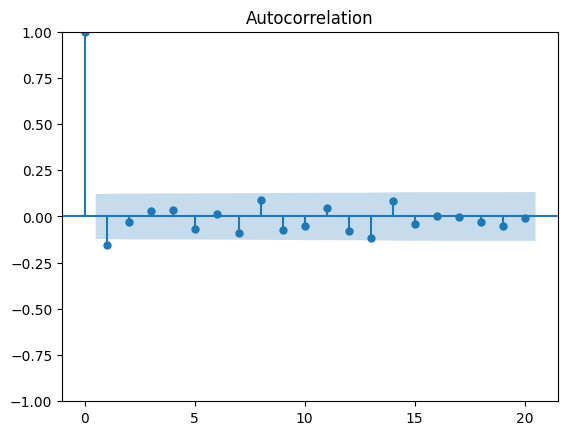

In [18]:
# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags = 20)
plt.show()

### Can't Forecast White Noise
A white noise time series is simply a sequence of uncorrelated random variables 
that are identically distributed. Stock returns are often modeled as white noise. 
Unfortunately, for white noise, we cannot forecast future observations based on 
the past - autocorrelations at all lags are zero.

We will generate a white noise series and plot the autocorrelation function to 
show that it is zero for all lags. We can use `np.random.normal()` to generate 
random returns. For a Gaussian white noise process, the mean and standard deviation 
describe the entire process.

Plot this white noise series to see what it looks like, and then plot the 
autocorrelation function.

In [20]:
# Set random seed
np.random.seed(42)

# Simulate white noise returns
loc = 0.02
scale = 0.05
returns = np.random.normal(loc=loc, scale=scale, size=1000)

# Print out the mean and standard deviation of returns
mean = np.mean(returns)
std = np.std(returns)
print("The mean is %5.3f and the standard deviation is %5.3f" %(mean,std))

The mean is 0.021 and the standard deviation is 0.049


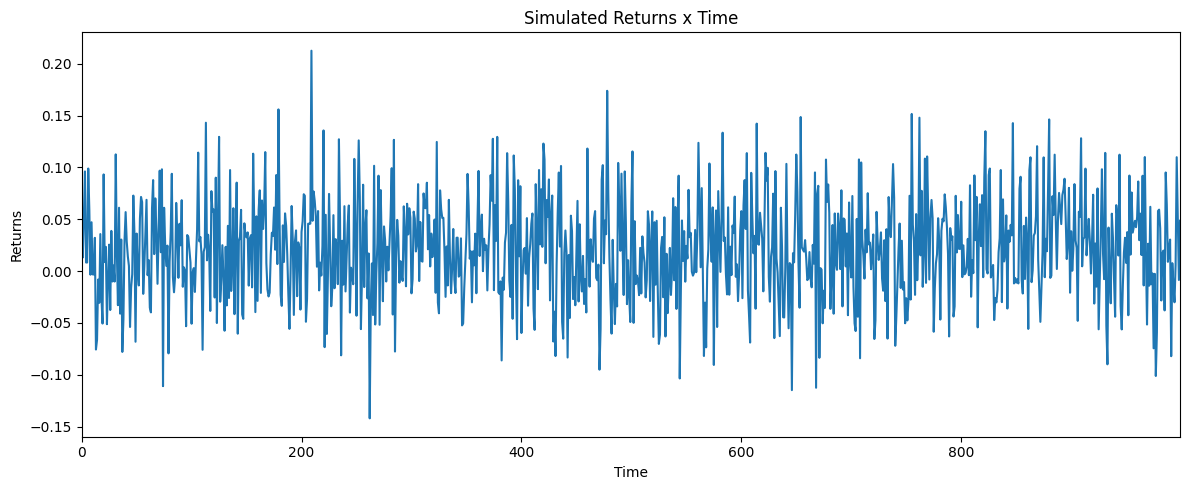

In [21]:
# Plot the time series
plt.figure(figsize=(12, 5))
plt.plot(returns)
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Simulated Returns x Time')
plt.xlim(0, 999)
plt.tight_layout()
plt.show()

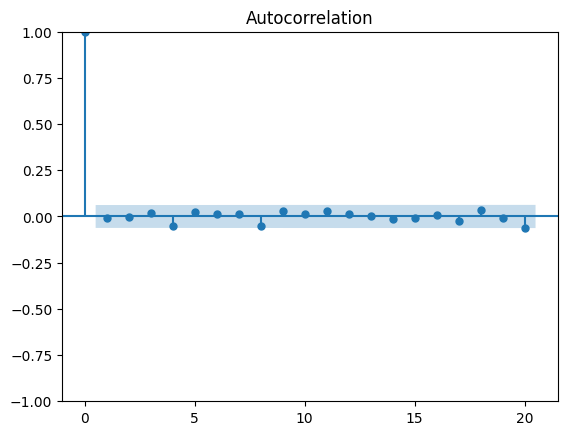

In [22]:
# Plot autocorrelation function of white noise returns
plot_acf(returns, lags= 20)
plt.show()

### Generate a Random Walk
Whereas stock returns are often modeled as white noise, stock prices closely follow a random walk. In other words, today's price is yesterday's price plus some random noise.

We will simulate the price of a stock over time that has a starting price of 
100 and every day goes up or down by a random amount. Then, plot the simulated 
stock price.

In [24]:
# Set random seed
np.random.seed(18)

# Generate 500 random steps with mean=0 and standard deviation=1
steps = np.random.normal(loc=0, scale=1, size=500)

# Set first element to 0 so that the first price will be the starting stock price
steps[0]=0

# Simulate stock prices, P with a starting price of 100
P = 100 + np.cumsum(steps)

In [25]:
len(P)

500

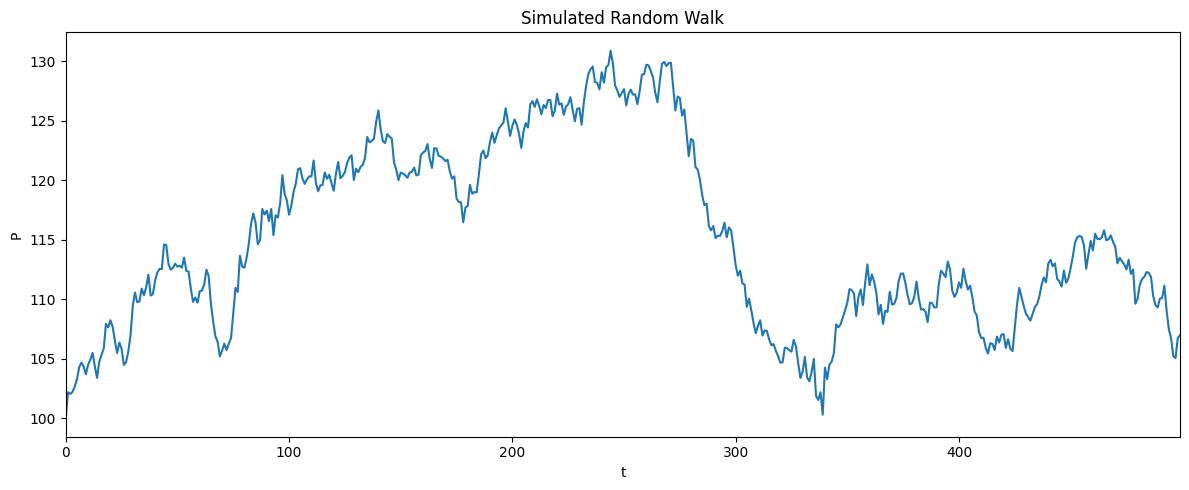

In [26]:
# Plot the time series
plt.figure(figsize=(12, 5))
plt.plot(P)
plt.xlabel('t')
plt.ylabel('P')
plt.title('Simulated Random Walk')
plt.xlim(0, 499)
plt.tight_layout()
plt.show()

In [27]:
P.mean()

115.1399872919024

### Get the Drift
We simulated stock prices that follow a random walk. We will look at a random walk with a drift. Many time series, like stock prices, 
are random walks but tend to drift up over time. In the last exercise, the noise in the random walk was additive: random, normal 
changes in price were added to the last price. However, when adding noise, we could theoretically get negative prices. 

Now we will make the noise multiplicative: we will add one to the random, normal changes to get a total return, and multiply that by the last price.

In [29]:
# Set random seed
np.random.seed(18)

# Generate 500 random steps
steps = np.random.normal(loc=0.001, scale=0.01, size=500) + 1

# Set first element to 1
steps[0]=1

# Simulate the stock price, P, by taking the cumulative product
P = 100 * np.cumprod(steps)

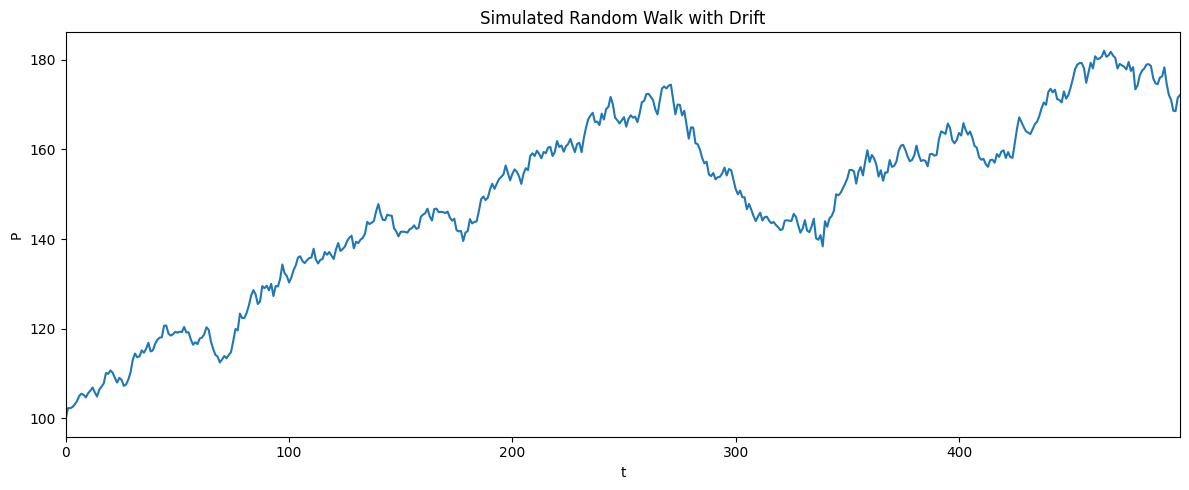

In [30]:
# Plot the time series
plt.figure(figsize=(12, 5))
plt.plot(P)
plt.xlabel('t')
plt.ylabel('P')
plt.title('Simulated Random Walk with Drift')
plt.xlim(0, 499)
plt.tight_layout()
plt.show()

In [31]:
P.mean()

148.82170920453547

### Are Stock Prices a Random Walk?
Most stock prices follow a random walk (perhaps with a drift). You will look at 
a time series of Amazon stock prices, pre-loaded in the DataFrame AMZN, and run 
the 'Augmented Dickey-Fuller Test' from the statsmodels library to show that it 
does indeed follow a random walk.

With the ADF test, the "null hypothesis" (the hypothesis that we either reject 
or fail to reject) is that the series follows a random walk. Therefore, a low 
p-value (say less than 5%) means we can reject the null hypothesis that the 
series is a random walk.

In [33]:
# Extract Dataset
AMZN = pd.read_excel('data/AMZN.xlsx')
AMZN = pd.DataFrame(AMZN)

# Set date as index
AMZN = AMZN.set_index('Date')

AMZN

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083
...,...
2017-07-27,1046.000000
2017-07-28,1020.039978
2017-07-31,987.780029


In [34]:
# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(AMZN['Adj Close'])

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: 4.02516852577074
p-value: 1.0

p-value > alpha; H0: Not Stationary


    A Random Walk is not stationary!

### How About Stock Returns?
In the last exercise, we showed that Amazon stock prices, contained in the 
DataFrame AMZN follow a random walk. In this exercise we will do the same 
thing for Amazon returns (percent change in prices) and show that the returns 
do not follow a random walk.

In [37]:
# Set date as index
AMZN .head()

,Adj Close
Date,
1997-05-15,1.958333
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635417
1997-05-21,1.427083


In [38]:
# Create a DataFrame of AMZN returns
AMZN_ret = AMZN.pct_change()

# Rename the 'Adj Close' column to 'AMZN Return'
AMZN_ret = AMZN_ret.rename(columns={'Adj Close': 'AMZN Return'})

AMZN_ret.head()

,AMZN Return
Date,
1997-05-15,NaN
1997-05-16,-0.117021
1997-05-19,-0.012049
1997-05-20,-0.042683
1997-05-21,-0.127389


In [39]:
# Eliminate the NaN in the first row of returns
AMZN_ret = AMZN_ret.dropna()

# Run the Augmented Dickey-Fuller (ADF) test
adf_result = adfuller(AMZN_ret['AMZN Return'])

# Display ADF test result
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print()

if adf_result[1] < 0.05:
    print("p-value < alpha; Ha: Stationary")
else:
    print("p-value > alpha; H0: Not Stationary")

ADF Statistic: -12.053453021869583
p-value: 2.565589808349559e-22

p-value < alpha; Ha: Stationary


    It is Stationary, so it is not a Random Walk.

### Seasonal Adjustment During Tax Season
Many time series exhibit strong seasonal behavior. The procedure for removing 
the seasonal component of a time series is called *seasonal adjustment*. For 
example, most economic data published by the government is seasonally adjusted.

You saw earlier that by taking first differences of a random walk, you get a 
stationary white noise process. For seasonal adjustments, instead of taking 
first differences, you will take differences with a lag corresponding to the 
periodicity.

Look again at the ACF of H&R Block's quarterly earnings, pre-loaded in the 
DataFrame HRB, and there is a clear seasonal component. The autocorrelation is 
high for lags 4,8,12,16,... because of the spike in earnings every four quarters 
during tax season. Apply a seasonal adjustment by taking the fourth difference 
(four represents the periodicity of the series). Then compute the autocorrelation 
of the transformed series.

In [42]:
HRB.head()

,Earnings
Quarter,
2007Q1,-0.36
2007Q2,-0.38
2007Q3,0.07
2007Q4,1.85
2008Q1,-0.34


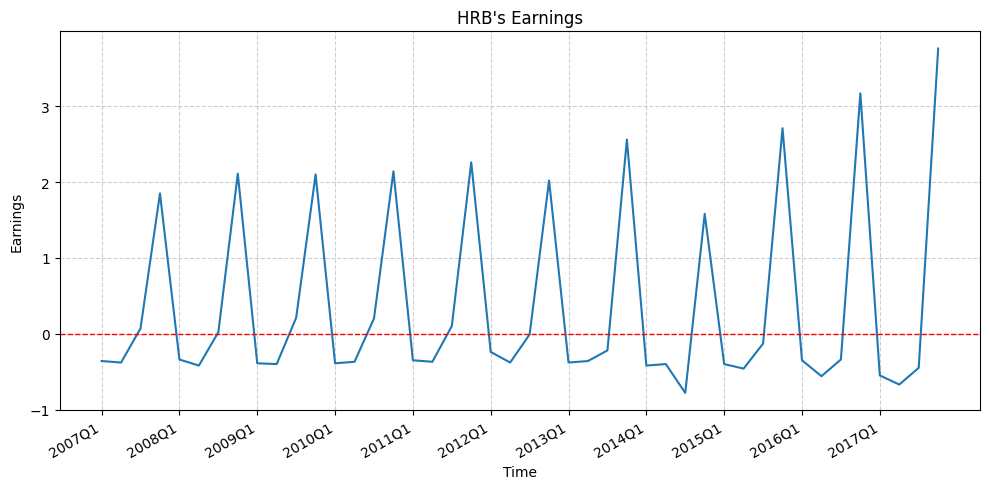

In [43]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(HRB)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1) 
ax.set_xlabel('Time')
ax.set_ylabel('Earnings')
ax.set_title("HRB's Earnings")
ax.grid(True, linestyle='--', alpha=0.6)  

# Set x-ticks every 4th tick
ticks = HRB.index[::4]  # Select every 4th index
ax.set_xticks(ticks)    # Set x-ticks

fig.autofmt_xdate()
plt.tight_layout()

In [44]:
# Seasonally adjust quarterly earnings
HRBsa = HRB.diff(4)  # computes the difference between each value in the HRB series and the value 4 periods before

# Print the first 10 rows of the seasonally adjusted series
print(HRBsa.head(10))

         Earnings
Quarter          
2007Q1        NaN
2007Q2        NaN
2007Q3        NaN
2007Q4        NaN
2008Q1       0.02
2008Q2      -0.04
2008Q3      -0.05
2008Q4       0.26
2009Q1      -0.05
2009Q2       0.02


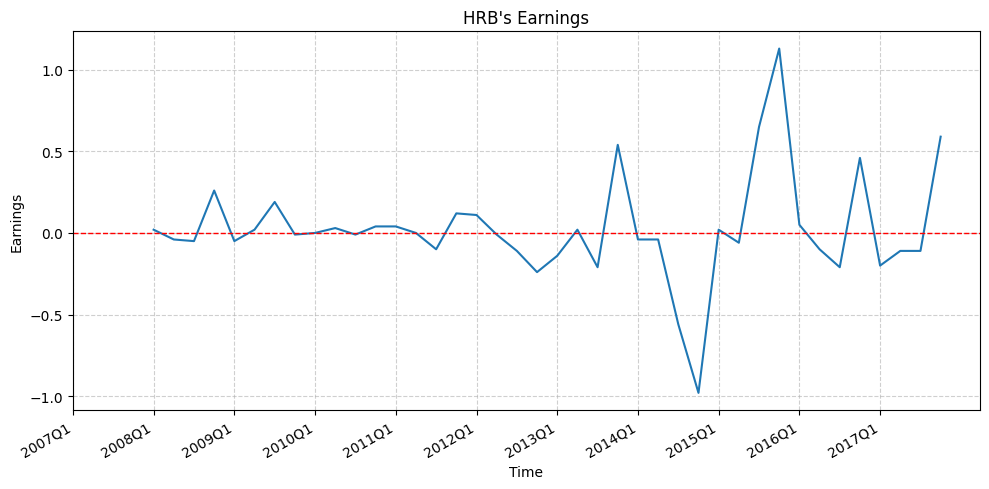

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(HRBsa)
ax.axhline(y=0, color='red', linestyle='--', linewidth=1) 
ax.set_xlabel('Time')
ax.set_ylabel('Earnings')
ax.set_title("HRB's Earnings")
ax.grid(True, linestyle='--', alpha=0.6)  

# Set x-ticks every 4th tick
ticks = HRB.index[::4]  # Select every 4th index
ax.set_xticks(ticks)    # Set x-ticks

fig.autofmt_xdate()
plt.tight_layout()

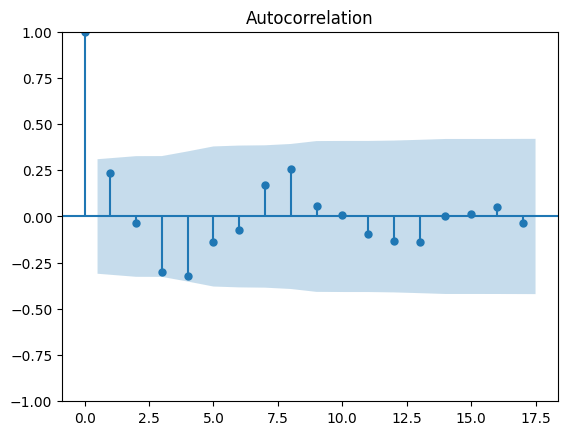

In [46]:
# Drop the NaN data in the first four rows
HRBsa = HRBsa.dropna()

# Plot the autocorrelation function of the seasonally adjusted series
plot_acf(HRBsa)
plt.show()